<a href="https://colab.research.google.com/github/vemula1802/PrinciplesOfBigdata/blob/main/pbproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline

import warnings; 
warnings.simplefilter('ignore')

#for loading csv into colab
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day (1).csv


In [158]:
df = pd.read_csv("city_day (1).csv")

In [159]:
display(df.head())

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [160]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [162]:
l=df.isnull().sum()
print(l)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [163]:
df.shape

(29531, 16)

In [164]:
df=df.fillna(df.mean())

In [165]:
df.shape

(29531, 16)

In [166]:
#Dropping all the null values
df= df.dropna()

In [167]:
df.shape

(24850, 16)

In [168]:
#converting string to date format
df['Date'] = pd.to_datetime(df['Date'])

In [169]:
print(f"The available data is between {df['Date'].min()} and {df['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [170]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']

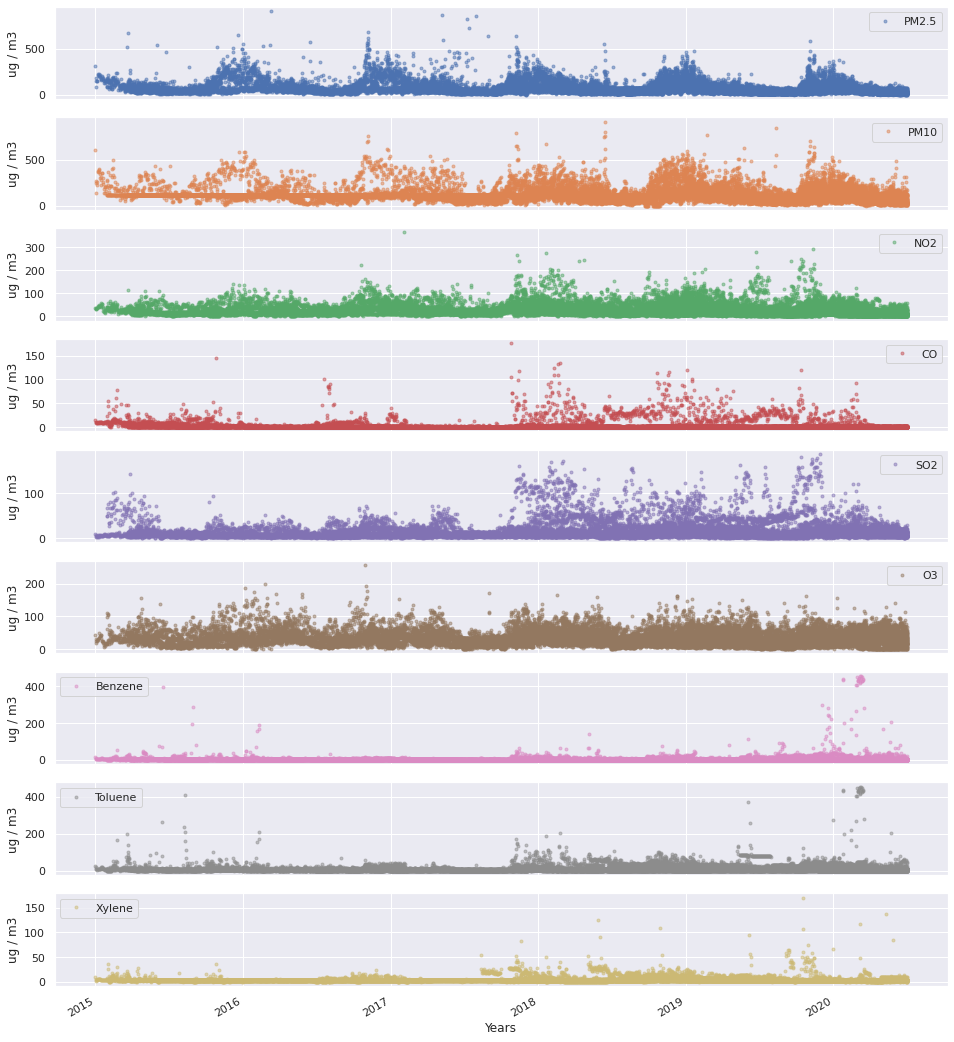

In [171]:
#Visualizing the pollutants value yearwise
df.set_index('Date',inplace=True)
axes = df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [17]:
import seaborn as sns


In [172]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()



In [173]:
df.reset_index(inplace=True)
df1 = df.copy()

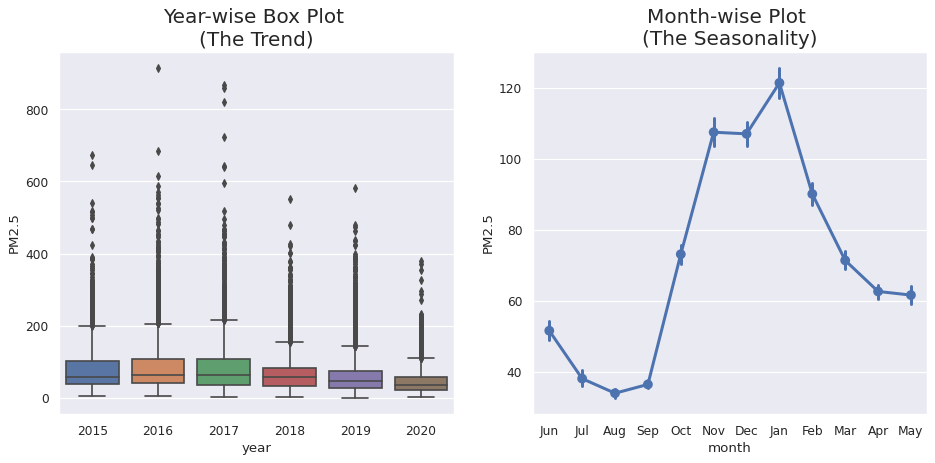

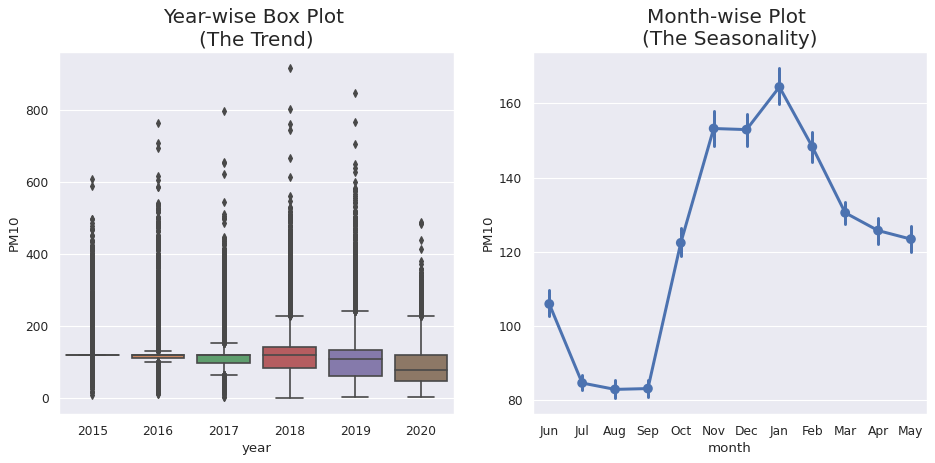

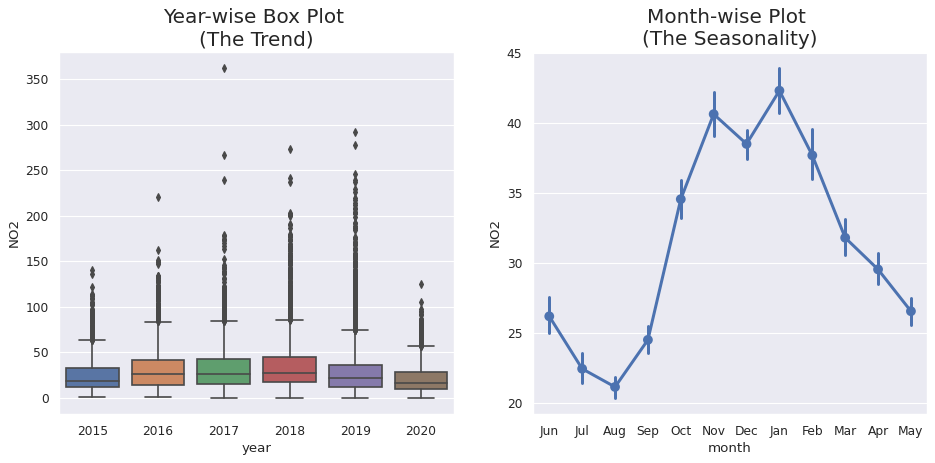

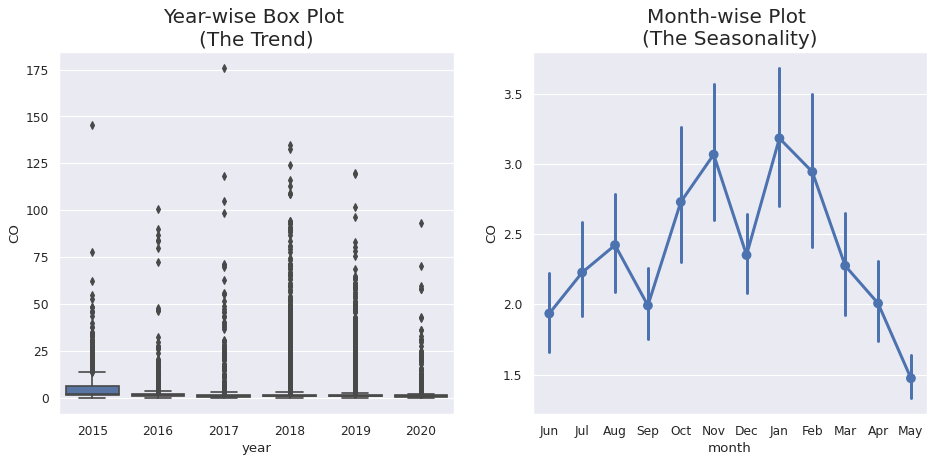

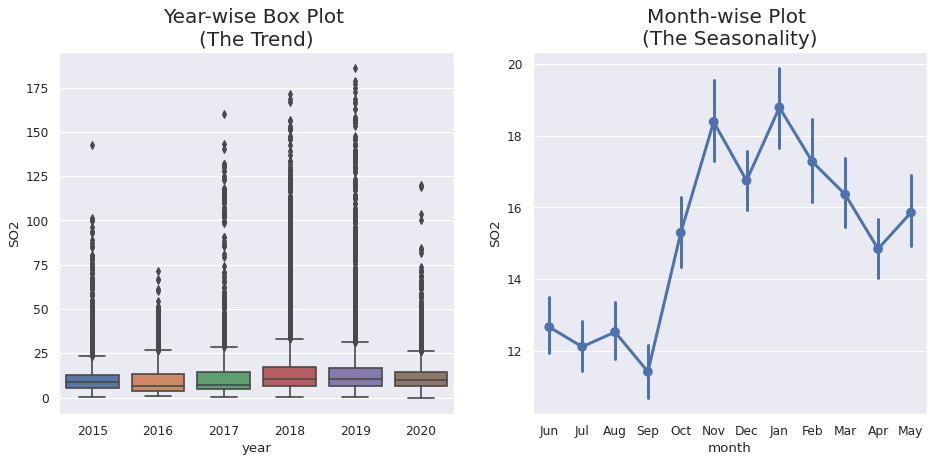

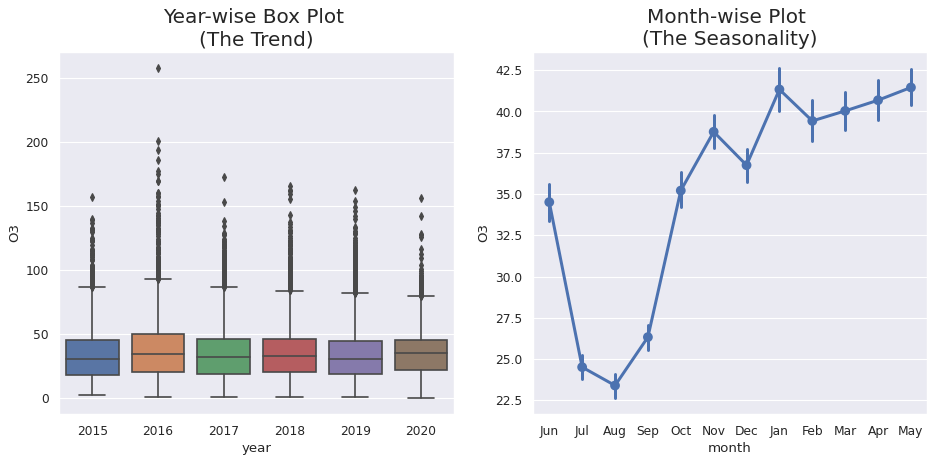

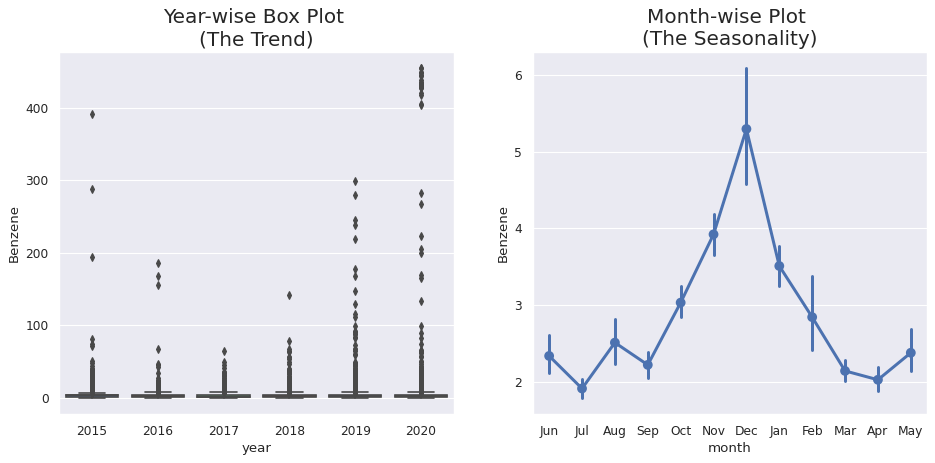

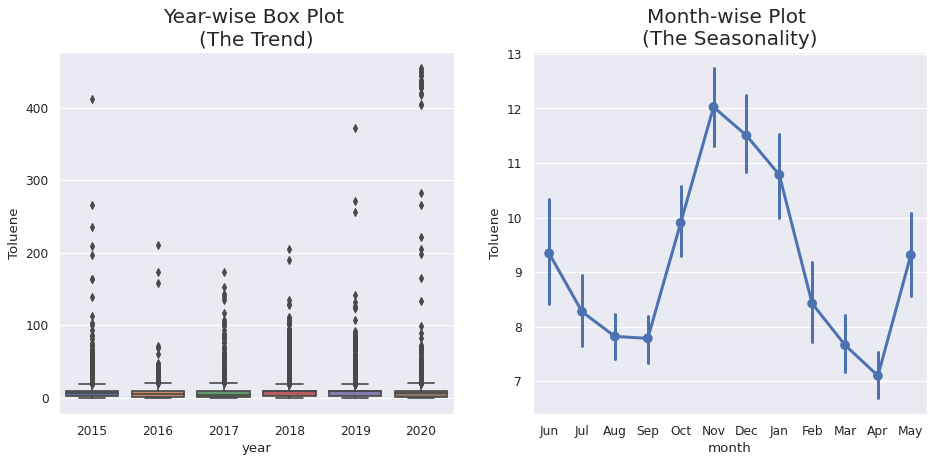

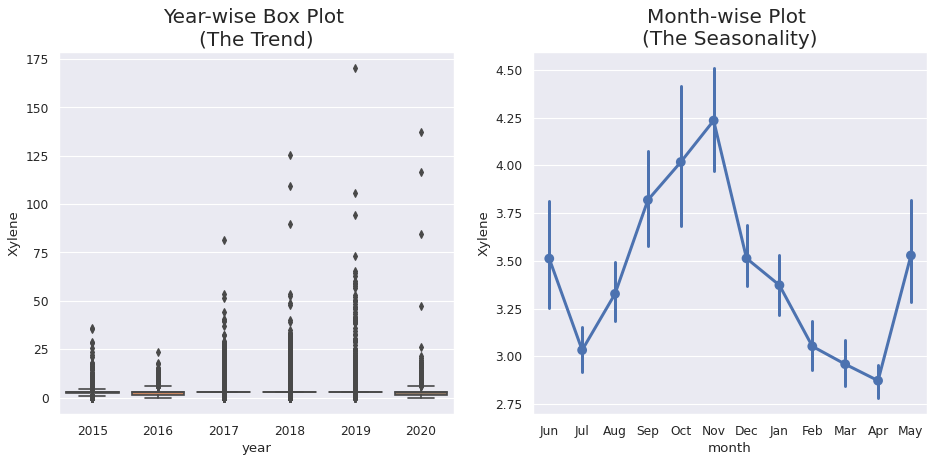

In [174]:


value='PM2.5'
trend_plot(df1,value)

value='PM10'
trend_plot(df1,value)

value='NO2'
trend_plot(df1,value)

value='CO'
trend_plot(df1,value)

value='SO2'
trend_plot(df1,value)

value='O3'
trend_plot(df1,value)

value='Benzene'
trend_plot(df1,value)

value='Toluene'
trend_plot(df1,value)

value='Xylene'
trend_plot(df1,value)



In [175]:
x2 = df.loc[:,['PM2.5','City']]
x3 = df.loc[:,['PM10','City']]

In [177]:
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

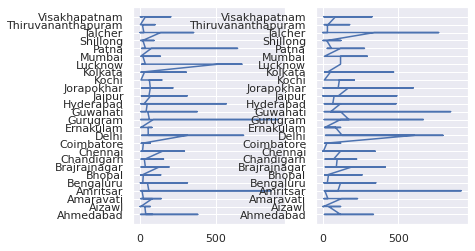

In [178]:
from plotly.subplots import make_subplots
fig, axe = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axe[0]
ax.plot(x2['PM2.5'],x2['City'])
ax = axe[1]
ax.plot(x3['PM10'],x3['City'])


In [181]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai','Amaravati','Visakhapatnam']

filtered_city_day = df[df['Date'] >= '2019-06-01']
AQIndex = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQIndex.head()

,Date,City,AQI,AQI_Bucket
949,2019-06-01,Ahmedabad,467.0,Severe
950,2019-06-02,Ahmedabad,402.0,Severe
951,2019-06-03,Ahmedabad,419.0,Severe
952,2019-06-04,Ahmedabad,408.0,Severe
953,2019-06-05,Ahmedabad,402.0,Severe


In [203]:
AQI_pivot = AQIndex.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)

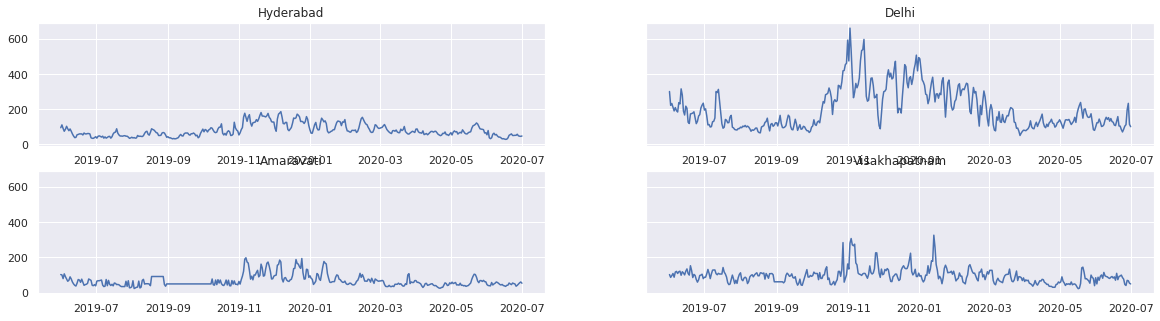

In [227]:
from plotly.subplots import make_subplots

fig, axe = plt.subplots(nrows=2, ncols=2,figsize=(20,5),sharey=True)
ax = axe[0][0]
ax.set_title("Hyderabad")
ax.plot(AQI_pivot.index, AQI_pivot['Hyderabad'])

ax = axe[0][1]
ax.set_title("Delhi")
ax.plot(AQI_pivot.index, AQI_pivot['Delhi'])

ax = axe[1][0]
ax.set_title("Amaravati")
ax.plot(AQI_pivot.index, AQI_pivot['Amaravati'])

ax = axe[1][1]
ax.set_title("Visakhapatnam")
ax.plot(AQI_pivot.index, AQI_pivot['Visakhapatnam'])

In [207]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [208]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Ahmedabad        383.776471
Amaravati         69.388235
Bengaluru         96.023529
Chennai           80.317647
Delhi            246.305882
Hyderabad         94.435294
Mumbai           148.776471
Visakhapatnam    104.647059
dtype: float64
City
Ahmedabad        127.810811
Amaravati         48.351351
Bengaluru         68.486486
Chennai           62.351351
Delhi            107.270270
Hyderabad         65.567568
Mumbai            73.891892
Visakhapatnam     57.513514
dtype: float64


In [209]:

#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [131]:
#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

"Delhi's AQI levels"

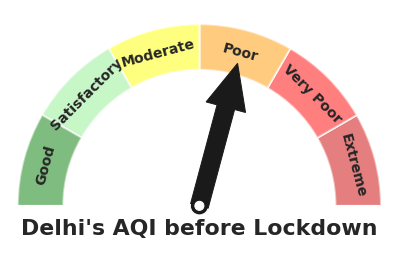

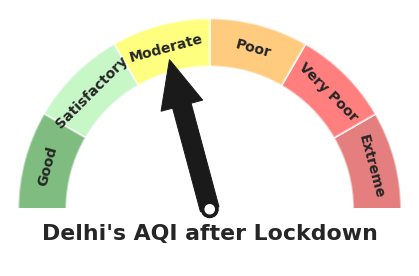

In [210]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Delhi's AQI after Lockdown") 


"Ahmedabad's AQI levels"

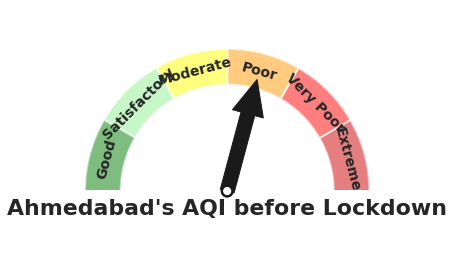

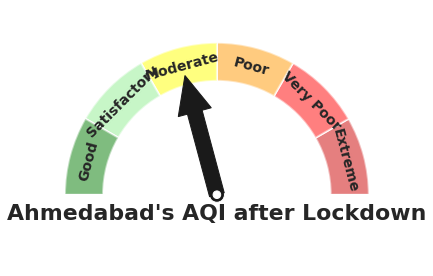

In [212]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Ahmedabad's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Ahmedabad's AQI after Lockdown") 


In [318]:
start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (df['Date'] >= start_date1) & (df['Date']  <= end_date1)
pollutants_filtered_before = df.loc[mask1]
pollutants_filtered_before.fillna(method='bfill',inplace=True)
pollutants_filtered_before.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (df['Date'] >= start_date2) & (df['Date']  <= end_date2)
pollutants_filtered_after = df.loc[mask2]
pollutants_filtered_after.fillna(method='bfill',inplace=True)
pollutants_filtered_after.set_index('Date',inplace=True);
dfbefore = pollutants_filtered_before[pollutants_filtered_before.City.isin(cities)][['City','NO2','SO2','PM2.5','CO','AQI']]
dfafter = pollutants_filtered_after[pollutants_filtered_after.City.isin(cities)][['City','NO2','SO2','PM2.5','CO','AQI']]

In [319]:

dfbefore.to_csv('samplebefore.csv')
files.download('samplebefore.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [316]:
def pollution_comparison(city):
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (30,5)
    plt.plot(dfbefore[dfbefore['City']==city].index,dfbefore[dfbefore['City']==city]['NO2'], label='NO2')
    plt.plot(dfbefore[dfbefore['City']==city].index,dfbefore[dfbefore['City']==city]['SO2'], label='SO2')
    plt.plot(dfbefore[dfbefore['City']==city].index,dfbefore[dfbefore['City']==city]['PM2.5'], label='PM2.5')
    plt.plot(dfbefore[dfbefore['City']==city].index,dfbefore[dfbefore['City']==city]['CO'], label='CO')
    plt.legend()
    plt.show()




    plt.plot(dfafter[dfafter['City']==city].index,dfafter[dfafter['City']==city]['NO2'], label='NO2')
    plt.plot(dfafter[dfafter['City']==city].index,dfafter[dfafter['City']==city]['SO2'], label='SO2')
    plt.plot(dfafter[dfafter['City']==city].index,dfafter[dfafter['City']==city]['PM2.5'], label='PM2.5')
    plt.plot(dfafter[dfafter['City']==city].index,dfafter[dfafter['City']==city]['CO'], label='CO')
    plt.legend()
    plt.show()
    

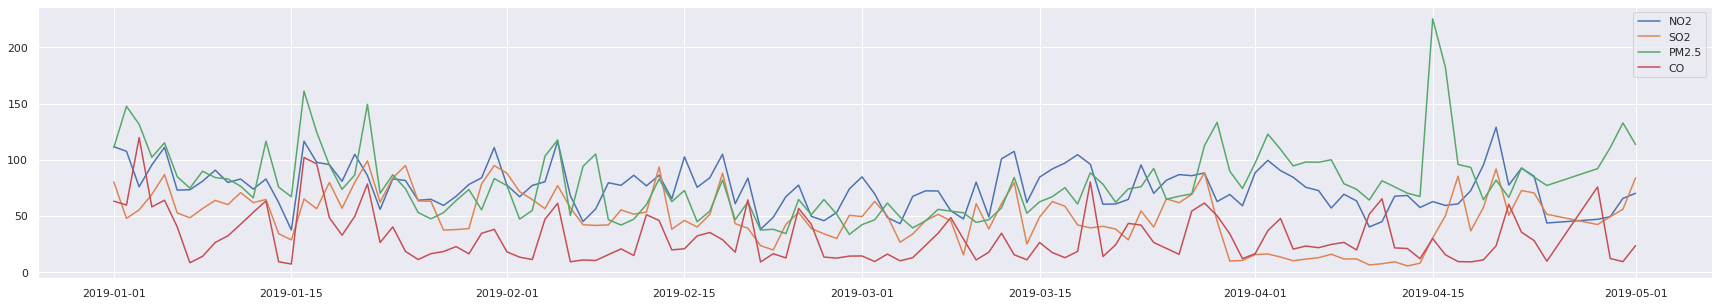

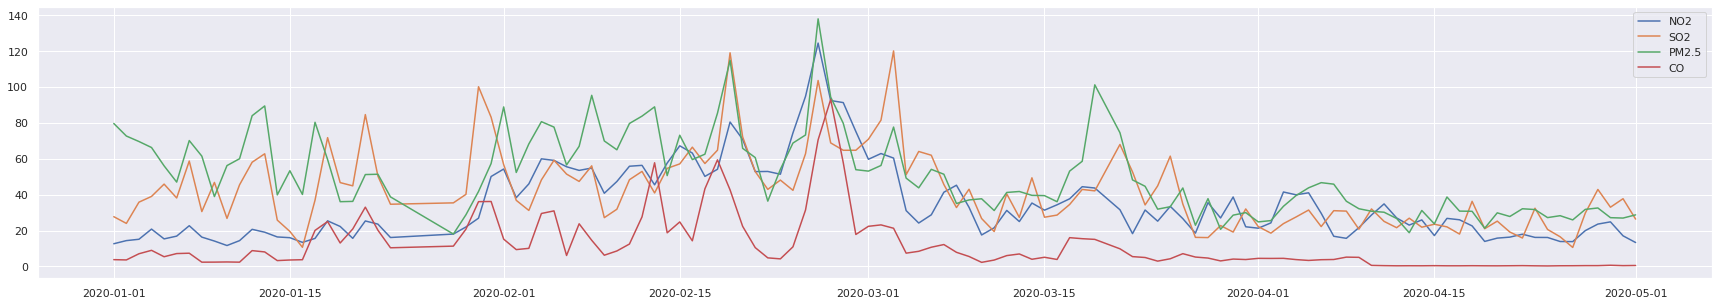

In [317]:
pollution_comparison('Ahmedabad')

In [326]:
def AQI_comparison(city):
    plt.rcParams["figure.figsize"] = (30,5)
    plt.plot(dfbefore[dfbefore['City']==city].index,dfbefore[dfbefore['City']==city]['AQI'], label='AQIbefore')
    plt.show()
    
    plt.plot(dfafter[dfafter['City']==city].index,dfafter[dfafter['City']==city]['AQI'], label='AQIafter')
    plt.show()

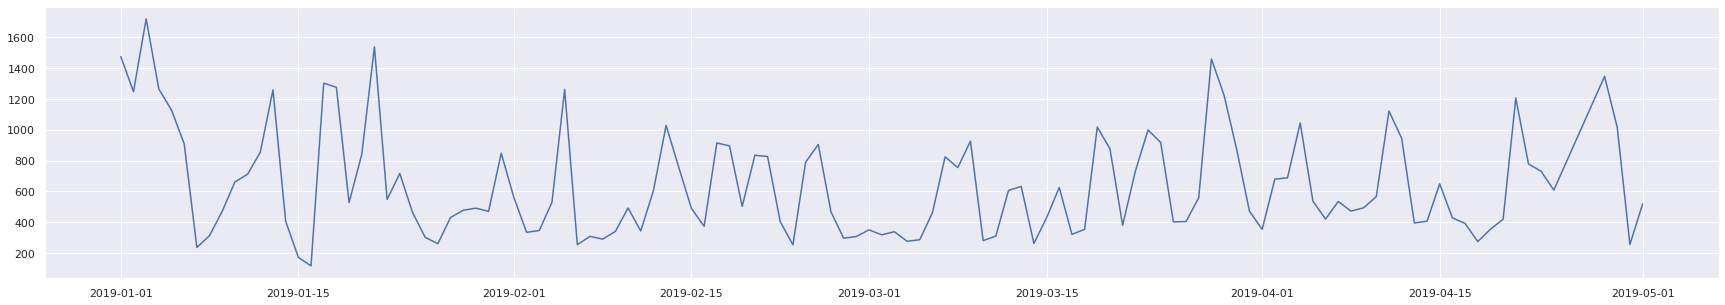

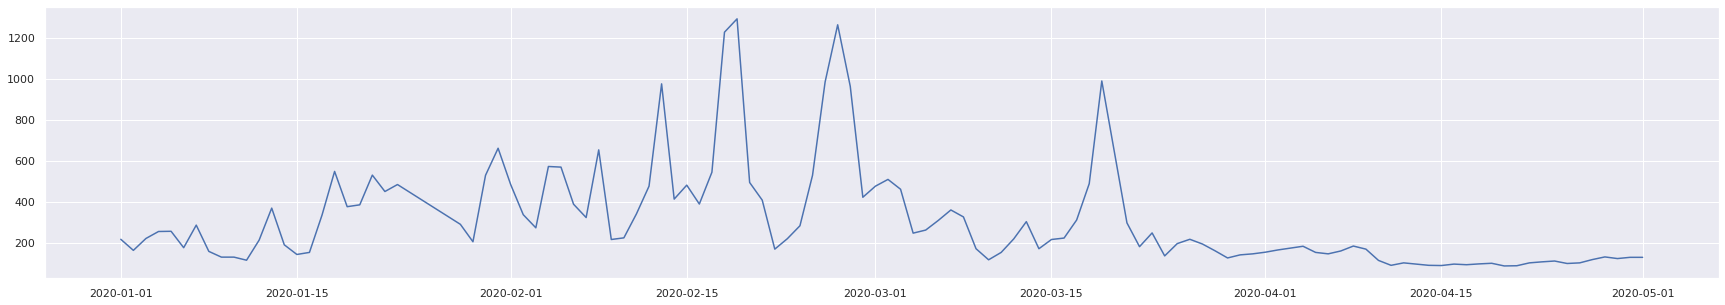

In [327]:
AQI_comparison('Ahmedabad')